In [84]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#lectura y carga de datos del dataset
data = pd.read_csv("Adidas_Data.csv")
#Veamos las primeras y ultimas 5 filas del dataset para observar su estructura y variables
data.head() 

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2006-05-31,19.954313,24.9625,24.9750,24.962500,24.9625,28000
1,2006-06-01,19.834412,24.8125,24.8125,24.812500,24.8125,1600
2,2006-06-02,20.214109,25.2875,25.2875,25.250000,25.2875,1600
3,2006-06-05,20.184134,25.2500,25.2500,25.250000,25.2500,2000
4,2006-06-06,19.534645,24.4375,24.6500,24.075001,24.4375,10400


In [2]:
data.tail()

,Date,Adj_Close,Close,High,Low,Open,Volume
4674,2024-12-24,122.980003,122.980003,124.580002,119.279999,121.930000,19600
4675,2024-12-26,124.099998,124.099998,124.839996,121.699997,122.239998,19400
4676,2024-12-27,122.709999,122.709999,123.680000,122.330002,123.370003,124000
4677,2024-12-30,122.389999,122.389999,124.050003,121.080002,121.750000,66500
4678,2024-12-31,121.769997,121.769997,122.930000,120.900002,122.690002,27300


In [3]:
#A continuación, se observará el tipo de datos correspondiente a cada una de las variables
data.dtypes

Date          object
Adj_Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [4]:
#Para ver si hay datos faltantes se utiliza la función isna() que categoriza como valor true a las celdas con datos NA
data.isna()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4674,False,False,False,False,False,False,False
4675,False,False,False,False,False,False,False
4676,False,False,False,False,False,False,False
4677,False,False,False,False,False,False,False


In [5]:
#Para ver que sucede en todo el dataset se suman los valores true (faltantes) de toda la tabla
data.isna().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

Date         datetime64[ns]
Adj_Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

In [7]:
#se procedera a identificar Outliers en el precio diario de apertura y cierre de las acciones, 
#que podrian afectar de manera negativa a la predicción futura. El método escogido para
#encontrar los outliers es el de cálculo de la variable estandarizada

data["Adj_Close_Standard"] = (data["Adj_Close"] - np.mean(data["Adj_Close"])) / np.std(data["Adj_Close"])
data["Open_Standard"] = (data["Open"] - np.mean(data["Open"])) / np.std(data["Open"])
data

,Date,Adj_Close,Close,High,Low,Open,Volume,Adj_Close_Standard,Open_Standard
0,2006-05-31,19.954313,24.962500,24.975000,24.962500,24.962500,28000,-1.044893,-1.036651
1,2006-06-01,19.834412,24.812500,24.812500,24.812500,24.812500,1600,-1.047431,-1.039832
2,2006-06-02,20.214109,25.287500,25.287500,25.250000,25.287500,1600,-1.039393,-1.029760
3,2006-06-05,20.184134,25.250000,25.250000,25.250000,25.250000,2000,-1.040028,-1.030555
4,2006-06-06,19.534645,24.437500,24.650000,24.075001,24.437500,10400,-1.053777,-1.047784
...,...,...,...,...,...,...,...,...,...
4674,2024-12-24,122.980003,122.980003,124.580002,119.279999,121.930000,19600,1.136175,1.019567
4675,2024-12-26,124.099998,124.099998,124.839996,121.699997,122.239998,19400,1.159885,1.026140
4676,2024-12-27,122.709999,122.709999,123.680000,122.330002,123.370003,124000,1.130459,1.050102
4677,2024-12-30,122.389999,122.389999,124.050003,121.080002,121.750000,66500,1.123684,1.015750


In [8]:
Out_Close = data[data["Adj_Close_Standard"]>=3]
Out_Close

,Date,Adj_Close,Close,High,Low,Open,Volume,Adj_Close_Standard,Open_Standard


In [9]:
Out_Open = data[data["Open_Standard"]>=3]
Out_Open

,Date,Adj_Close,Close,High,Low,Open,Volume,Adj_Close_Standard,Open_Standard


Text(0, 0.5, 'Adj_Close[USD]')

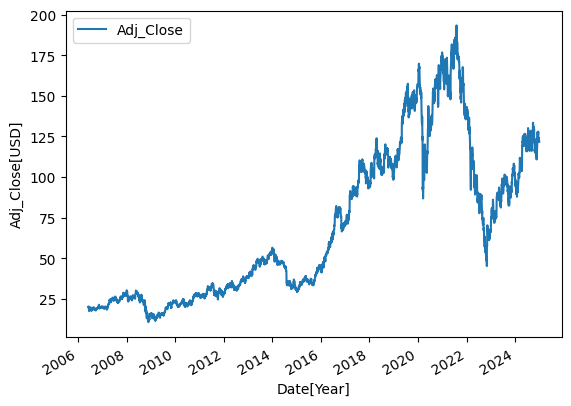

In [10]:
#Elaboración de un gráfico de linea para observar la evolucion en el tiempo del precio de
#cierre de las acciones de Adidas

data.plot(x = "Date", y = "Adj_Close", kind = "line")
plt.xlabel("Date[Year]")
plt.ylabel("Adj_Close[USD]")

In [11]:
#Dado que por año hay alrededor de 365 datos de cada variable, se procedió a extraer el año de cada una de las fechas 
#presentes en el dataset, para luego agrupar los valores de cierre ajustados (Adj_Close)
#correspondientes a un mismo año, calcular el valor medio de esa variablepara cada año y luego representar 
#el valor medio de cierre de cada año en un gràfico de lineas, para compararlo con la visualización
#antes construida.
data["Year"] = data["Date"].dt.year
data.dtypes

Date                  datetime64[ns]
Adj_Close                    float64
Close                        float64
High                         float64
Low                          float64
Open                         float64
Volume                         int64
Adj_Close_Standard           float64
Open_Standard                float64
Year                           int32
dtype: object

In [12]:
Annual_Adj_Close = data.groupby(["Year"], as_index = False ).agg({"Adj_Close":"mean"})
Annual_Adj_Close

,Year,Adj_Close
0,2006,19.142993
1,2007,23.844187
2,2008,22.957393
3,2009,17.514338
4,2010,23.573541
5,2011,28.951881
6,2012,33.804415
7,2013,46.970536
8,2014,41.988622
9,2015,36.840054


<Axes: xlabel='Year'>

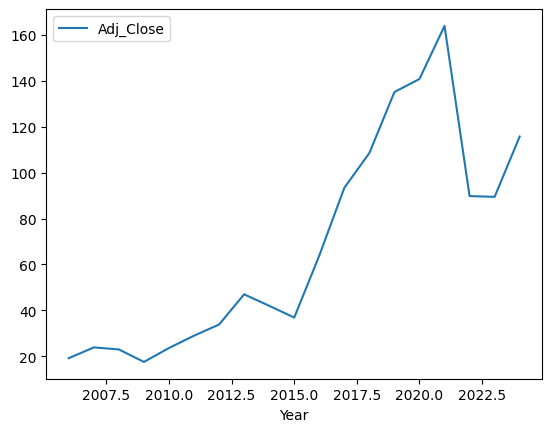

In [13]:
Annual_Adj_Close.plot(x = "Year", y = "Adj_Close", kind = "line")

In [76]:
#Crear variable objetivo a corto/mediano plazo
data["Adj_Close_Prediction"] = data["Adj_Close"].shift(-5)  # Precio de cierre ajustado 5 días a futuro
data = data.dropna()

In [77]:
correlation_matrix = data[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj_Close_Prediction']].corr()

In [78]:
correlation_matrix['Adj_Close_Prediction'].sort_values(ascending=False)

Adj_Close_Prediction    1.000000
Adj_Close               0.996805
High                    0.995930
Close                   0.995891
Open                    0.995734
Low                     0.995718
Volume                  0.051205
Name: Adj_Close_Prediction, dtype: float64

In [79]:
#Separacion de set de datos en entrenamiento y test
X = data[['Adj_Close', 'High', 'Close', 'Open', 'Low']]
y = data['Adj_Close_Prediction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # shuffle=False respeta el orden temporal de la serie
)

In [80]:
# Aplicacion del modelo de Regresion Lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
# Evaluación de resultados
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.9735246191841357
MAE: 4.44
RMSE: 5.71


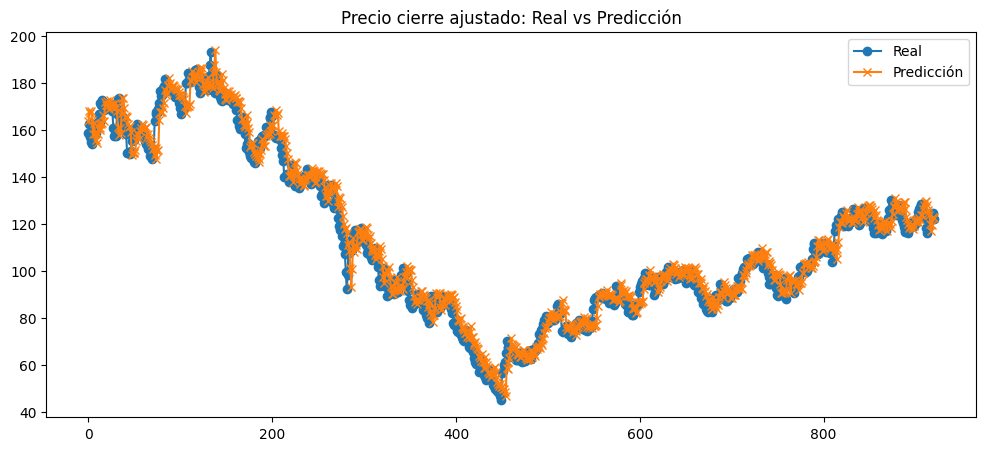

In [82]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_pred, label='Predicción', marker='x')
plt.title('Precio cierre ajustado: Real vs Predicción')
plt.legend()
plt.show()

In [89]:
# Predicciones para cada conjunto, para analizar si existe overfitting y es por eso que el modelo presenta buen desempeño
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [97]:
#Metricas para datos de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

#Metricas para datos de test
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)


In [98]:
print("Entrenamiento:")
print("R²:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

print("\nTest:")
print("R²:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)


Entrenamiento:
R²: 0.9946166703263664
MAE: 9.904934475801662
RMSE: 3.147210586503811

Test:
R²: 0.9735246191841357
MAE: 32.60891124379956
RMSE: 5.710421284266124


In [99]:
#Dado que en ambos casos el R² es mayor a 0.95 puede concluirse que no hay un overfitting severo y que el modelo generaliza bien.
#El MAE y RMSE en test son notablemente más altos que en entrenamiento, lo que sugiere que el modelo podría estar capturando algunos detalles
#específicos del train que no se replican igual en el test. Es un leve signo de sobreajuste, pero no afecta al desempeño general del modelo..